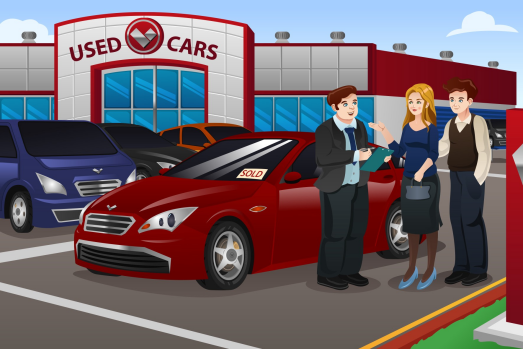

## CHANGE DIRECTORY

In [17]:
import os
os.chdir(r'C:\Users\praka\OneDrive\Desktop\METRO\MLBDA_KRU\PROJECT\REGRESSION')
os.getcwd()

'C:\\Users\\praka\\OneDrive\\Desktop\\METRO\\MLBDA_KRU\\PROJECT\\REGRESSION'

## IMPORT THE PACKAGES

In [18]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [19]:
df= pd.read_csv('train-data.csv')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## STRUCTURE OF THE DATA

In [20]:
#getting the shape of data
df.shape

(6019, 13)

In [21]:
#checking  number of obs and columns ,index of columns, name of columns, number of non_null values and datatype, (memory usage,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [22]:
#drop duplicate obs from train data set
df=df.drop_duplicates()

## DATA PRE-PROCESSING

In [23]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [24]:

df = df.replace('null bhp',np.NaN)
df.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_Price             True
Price                False
dtype: bool

In [25]:
df_cat = df.select_dtypes(exclude="object")
df_cat.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price'], dtype='object')

In [26]:
df_cat = df.select_dtypes(include="object")
df_cat.columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object')

In [27]:
df = df.drop(['Name','Location','New_Price'],axis=1)
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [28]:
# using dropna() function  
df = df.dropna()

In [29]:
df.apply(lambda x: sum(x.isnull()))

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [30]:
#pre-processing the columns to convert string to numeric
df['Mileage'] = df['Mileage'].str.rstrip('kmpl')
print('\n',df.Mileage.head(2))
df['Mileage'] = df['Mileage'].str.rstrip('km/kg')
df.Mileage = df.Mileage.astype(float)
print(df.Mileage.head(2))

df['Engine'] = df['Engine'].str.rstrip('CC')
print('\n',df.Engine.head(2))
df.Engine = df.Engine.astype(float)
print(df.Engine.head(2))


df['Power'] = df['Power'].str.rstrip('bhp')
print('\n',df.Power.head(2))
df.Power = df.Power.astype(float)
print(df.Power.head(2))



 0    26.6 km/kg
1        19.67 
Name: Mileage, dtype: object
0    26.60
1    19.67
Name: Mileage, dtype: float64

 0     998 
1    1582 
Name: Engine, dtype: object
0     998.0
1    1582.0
Name: Engine, dtype: float64

 0    58.16 
1    126.2 
Name: Power, dtype: object
0     58.16
1    126.20
Name: Power, dtype: float64


In [15]:
df

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [32]:
df.to_csv(r'C:\Users\praka\OneDrive\Desktop\METRO\MLBDA_KRU\PROJECT\REGRESSION\cardata_preprocessed.csv', index = False)


## DATA ENCODING

In [31]:
#Create a dataframe that has the dummy variables for categorical ariables
dummies = pd.get_dummies(df[[
'Fuel_Type',
'Transmission',
'Owner_Type'
]])

dummies.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1,0,0,0,0,1,1,0,0,0
1,0,1,0,0,0,1,1,0,0,0
2,0,0,0,1,0,1,1,0,0,0
3,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,1,0,0,0,1,0


In [32]:
df = df.drop(['Fuel_Type','Transmission','Owner_Type'], axis=1)

In [33]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010,72000,26.60,998.0,58.16,5.0,1.75
1,2015,41000,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,15.20,1968.0,140.80,5.0,17.74


In [34]:
#Concatenate the dummy variables to the dataframe without the Embarked variable

df = pd.concat([df,dummies],axis=1)

df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0


In [35]:

df['Current_Year']=2021
df.head()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Current_Year
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0,2021
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0,2021
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0,2021
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0,2021
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0,2021


In [36]:
df['Number_of_Years']=df.Current_Year-df.Year

In [37]:


df.drop(['Year','Current_Year'],axis=1,inplace=True)

In [38]:
df.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Number_of_Years
0,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0,11
1,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0,6
2,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0,10
3,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0,9
4,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0,8


<AxesSubplot:>

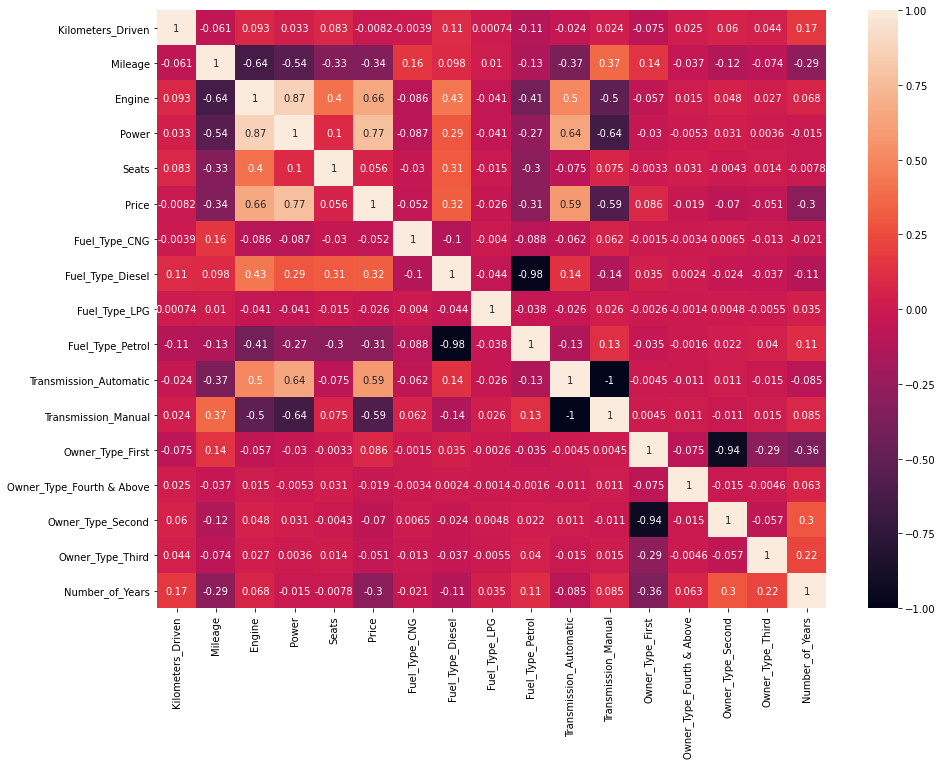

In [39]:
df.corr()
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)

##### CONCLUSION : Checked correlation of all other variables with target variable.Power & engine seems to be highly & positively correlated with price with 0.77, 0.66 respectively



## EXTRACT INDEPENDENT & DEPENDENT VARIABLES

In [40]:

X = df.drop(['Price'],axis=1)
y = df.Price

## CROSS - VALIDATION SCORE

In [41]:
lr = LinearRegression()
print(cross_val_score(lr,X,y,cv=5).mean())

0.6613919880905021


## GRID SEARCH CV FOR BEST PARAMETERS

In [45]:
params = {
            'fit_intercept': ['bool','default'],
            'normalize': ['bool','default']
        }
model = GridSearchCV(LinearRegression(), params,cv=4)
model.fit(X,y)



GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['bool', 'default'],
                         'normalize': ['bool', 'default']})

In [46]:
model.best_params_

{'fit_intercept': 'bool', 'normalize': 'bool'}

In [47]:
model.best_score_

0.6558780398253029

In [48]:
best_model = model.best_estimator_

## TRAIN-TEST

In [49]:
#split to train and test for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)



## SCALING

In [50]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

## CORRELATION MATRIX

<AxesSubplot:>

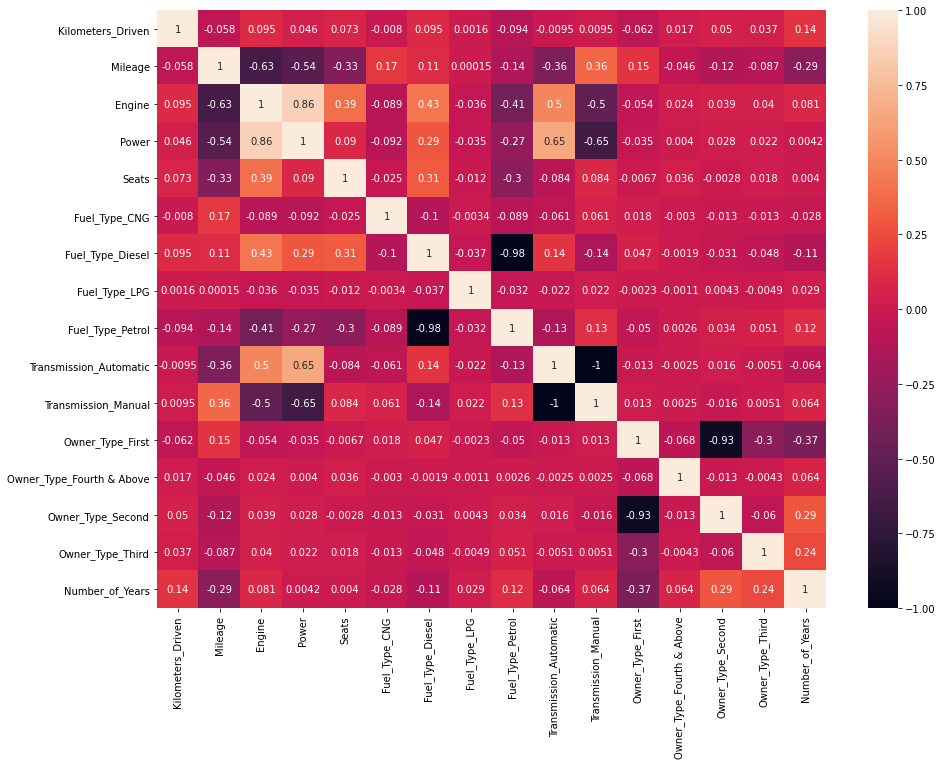

In [32]:
plt.figure(figsize=(15,11))
sns.heatmap(X_train_scaled.corr(),annot=True)

## PCA ON SCALED DATA

In [92]:
'''
PCA uses Singular Value Decomposition to calculate 
new features that help discrimate based on their differences
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train_scaled.values)

PCA(n_components=5)

In [93]:
#Explained variance shows discriminating power of each new feature 
#the first five are chosen as the values are significant
pca.explained_variance_ratio_

array([0.23435162, 0.14884975, 0.12304275, 0.08681211, 0.06625204])

In [94]:
#the new features (principal components) do not have much 
#physical interpretation as the original features 
#but are calculated/derived using the original features 
X_train_pca = pd.DataFrame(pca.transform(X_train_scaled))
X_train_pca.head()


,0,1,2,3,4
0,2.298944,-0.907711,-0.455412,-1.188682,0.941838
1,7.180125,1.764887,-2.807175,2.172790,0.054482
2,-0.882906,-1.736016,1.036013,-0.740702,0.418927
3,-2.026440,-0.320742,-1.028777,0.119051,-0.318363
4,-1.264492,-1.841945,0.955744,-0.862492,0.267394


In [95]:
X_train_pca.shape

(4110, 5)

In [96]:
#remodelling in the new feature space
model_pca = best_model 
model_pca.fit(X_train_pca,y_train)

LinearRegression(fit_intercept='bool', normalize='bool')

In [97]:
model_pca.score(X_train_pca,y_train)

0.5950539212529369

In [98]:
#To retrieve the intercept:
print(model_pca.intercept_)

#For retrieving the slope:
print(model_pca.coef_)

9.327532846715329
[ 3.93906459 -1.27278695 -1.39064991 -0.95844103 -0.24531786]


In [99]:
#the test set needs to be transformed as well
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))
model_pca.score(X_test_pca,y_test)

0.5754219206391624

In [100]:
#scoring the model on the new featureset
y_pred_pca = model_pca.predict(X_test_pca)

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pca))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pca))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error: 4.475335867441042
Mean Squared Error: 66.96044038824603
Root Mean Squared Error: 8.182935927174674


In [103]:
cv_lr = cross_val_score(estimator = lr, X = X, y = y, cv = 4)

y_pred_lr_train = model_pca.predict(X_train_pca)
r2_score_lr_train = r2_score(y_train, y_pred_lr_train)

y_pred_lr_test = model_pca.predict(X_test_pca)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)

rmse_knn = (np.sqrt(mean_squared_error(y_test, y_pred_lr_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_lr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_lr_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_lr_test))
print('RMSE : {0:.3f}'.format(rmse_knn))

CV Linear Regression : 0.656
R2_score (train) : 0.595
R2_score (test) : 0.575
RMSE : 8.183


## RESULTS

## KNN

In [151]:
#import the knn model
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor()
kr.fit(X,y)

KNeighborsRegressor()

## CROSS_VALIDATION SCORE

In [167]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(kr,X,y,cv=4).mean()

0.5287572653431943

In [154]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    kr = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(kr,X,y,cv=4).mean())
print(scores)

[0.39060607923858753, 0.49096742496710255, 0.5305765013736212, 0.5462236204230397, 0.5465635162956836, 0.546797266751315, 0.5388441286214667, 0.5369854908480343, 0.5356247811306522, 0.5287572653431943]


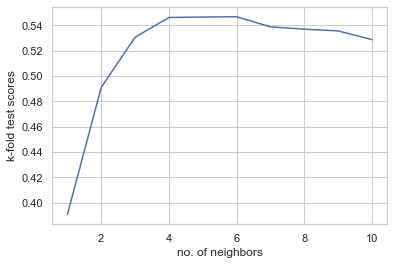

In [155]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

## TRAIN-TEST SPLIT

In [156]:

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## GRID SEARCH TO GET BEST PARAMETERS

In [157]:
params = {
            'n_neighbors': [3,4,5,6,7,8],
            'weights':['uniform', 'distance'],
            'metric' :['euclidean','manhattan']
        }
model = GridSearchCV(KNeighborsRegressor(), params,cv=4)
model.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']})

In [158]:
model.best_score_

0.5658346388352193

In [159]:
model.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [160]:
best_model = model.best_estimator_

In [161]:
best_model.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance')

In [162]:
y_pred = best_model.predict(X_test)

In [163]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
5642,0.85,6.604714
3499,10.94,18.514993
4478,3.00,3.465502
995,16.00,9.046121
4022,4.95,12.296224
...,...,...
556,3.80,4.022118
1964,1.80,1.554279
2976,3.10,3.549557
4000,1.80,4.987665


In [164]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.0396198088225646
Mean Squared Error: 55.09138121354687
Root Mean Squared Error: 7.4223568503236805


In [166]:
cv_knn_reg = cross_val_score(estimator = kr, X = X, y = y, cv = 4)

#y_pred_knn_reg_train = kr.predict(X_train)
#r2_score_knn_reg_train = r2_score(y_train, y_pred_knn_reg_train)

y_pred_knn_reg_test = best_model.predict(X_test)
r2_score_knn_reg_test = r2_score(y_test, y_pred_knn_reg_test)

rmse_knn = (np.sqrt(mean_squared_error(y_test, y_pred_knn_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_knn_reg.mean()))
#print('R2_score (train) : {0:.3f}'.format(r2_score_knn_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_knn_reg_test))
print('RMSE : {0:.3f}'.format(rmse_knn))

CV Linear Regression : 0.529
R2_score (test) : 0.615
RMSE : 7.422


## DECISION TREES

## CROSS _VALIDATION SCORE

In [187]:
dtr = DecisionTreeRegressor()
cross_val_score(DecisionTreeRegressor(),X,y,cv=4).mean()

0.7685578075883135

## HYPER-PARAMETER TUNNING

In [188]:
#hyper-parameter tuning on DecisionTree's max-depth
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,15,1):
    model = DecisionTreeRegressor(max_depth=i,random_state=0)
    kfold_score = cross_val_score(model, X, y, cv = 5).mean()
    scores.append(kfold_score)

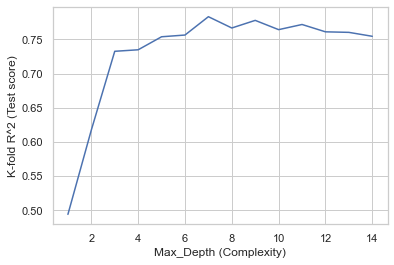

In [189]:
#plot k-fold scores vs max_depth values
import matplotlib.pyplot as plt
plt.plot(range(1,15,1),scores)
plt.xlabel('Max_Depth (Complexity)')
plt.ylabel('K-fold R^2 (Test score)')
plt.show()

In [218]:
model = DecisionTreeRegressor(max_depth=7)
model.fit(X,y)

DecisionTreeRegressor(max_depth=7)

[Text(167.4, 181.2, 'Power <= 164.85\nmse = 126.529\nsamples = 5872\nvalue = 9.604'),
 Text(83.7, 108.72, 'Engine <= 1958.0\nmse = 18.175\nsamples = 4797\nvalue = 5.854'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'Power <= 241.39\nmse = 267.37\nsamples = 1075\nvalue = 26.335'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

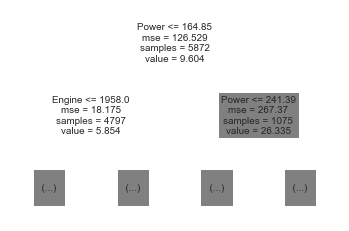

In [219]:
from sklearn.tree import plot_tree
plot_tree(model,feature_names=X.columns,max_depth=1)

## TRAIN-TEST SPLIT

In [220]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## GRID SEARCH CV FOR BEST PARAMETERS

In [221]:
params = {
            'max_depth': [6,7,8,9,10],
            'min_samples_split' : [1.0,2.0,3.0],
            'min_samples_leaf' :[0.5,1]
        }
model = GridSearchCV(DecisionTreeRegressor(), params,cv=4)
model.fit(X,y)

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\praka\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 235, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the float 2.0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\praka\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The 

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [1.0, 2.0, 3.0]})

In [222]:
model.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 1.0}

In [223]:
model.best_score_

0.4924282056158318

In [224]:
best_model = model.best_estimator_

## TRAIN-TEST SPLIT

In [225]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [226]:
best_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=1.0)

In [227]:
y_pred = best_model.predict(X_test)

In [228]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
5642,0.85,5.763142
3499,10.94,5.763142
4478,3.00,5.763142
995,16.00,5.763142
4022,4.95,5.763142
...,...,...
556,3.80,5.763142
1964,1.80,5.763142
2976,3.10,5.763142
4000,1.80,5.763142


In [229]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.750315405152554
Mean Squared Error: 71.06221741890505
Root Mean Squared Error: 8.429840889299456


In [230]:
cv_dt_reg = cross_val_score(estimator = dtr, X = X, y = y, cv = 4)

#y_pred_dt_reg_train = best_model.predict(X_train)
#r2_score_dt_reg_train = r2_score(y_train, y_pred_dt_reg_train)

y_pred_dt_reg_test = best_model.predict(X_test)
r2_score_dt_reg_test = r2_score(y_test, y_pred_dt_reg_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_dt_reg.mean()))
#print('R2_score (train) : {0:.3f}'.format(r2_score_dt_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_dt_reg_test))
print('RMSE : {0:.3f}'.format(rmse_dt))

CV Linear Regression : 0.767
R2_score (test) : 0.504
RMSE : 8.430


## RESULTS:

## RANDOM FOREST

## CROSS-VALIDATION SCORE

In [231]:
rfr = RandomForestRegressor()
cross_val_score(RandomForestRegressor(),X,y,cv=4).mean()

0.8727858056825951

## HYPER-PARAMETER TUNNING

In [232]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [233]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9),
                                  X,y,cv=4).mean())

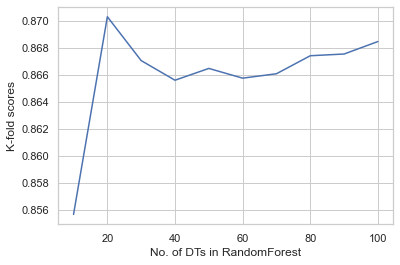

In [234]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

## GRID-SEARCH CV TO GET THE BEST PARAMETERS

In [235]:
params = {
            'n_estimators': [100,110,120,130],
            'max_depth': [16,17,18,19,20,21,22,23]
        }
model = GridSearchCV(RandomForestRegressor(), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [16, 17, 18, 19, 20, 21, 22, 23],
                         'n_estimators': [100, 110, 120, 130]})

In [236]:
model.best_params_

{'max_depth': 21, 'n_estimators': 100}

In [237]:
model.best_score_

0.8767267208591862

In [238]:
best_model = model.best_estimator_

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [240]:
best_model.score(X_test,y_test)

0.9812445114293001

## TRAIN-TEST SPLIT

In [241]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [242]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=21)

In [246]:
y_pred = best_model.predict(X_test)

In [247]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
5642,0.85,1.260900
3499,10.94,13.793700
4478,3.00,1.935500
995,16.00,11.788100
4022,4.95,4.239700
...,...,...
556,3.80,4.070833
1964,1.80,1.512600
2976,3.10,2.983533
4000,1.80,2.481763


In [248]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6865902408749105
Mean Squared Error: 13.53146217279453
Root Mean Squared Error: 3.6785135819777164


In [245]:
cv_rf_reg = cross_val_score(estimator = best_model, X = X, y = y, cv = 4)

#y_pred_rf_reg_train = reg.predict(X_train)
#r2_score_rf_reg_train = r2_score(y_train, y_pred_rf_reg_train)

y_pred_rf_reg_test = best_model.predict(X_test)
r2_score_rf_reg_test = r2_score(y_test, y_pred_rf_reg_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_rf_reg.mean()))
#print('R2_score (train) : {0:.3f}'.format(r2_score_rf_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_rf_reg_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV Linear Regression : 0.873
R2_score (test) : 0.906
RMSE : 3.679


## RESULTS

## ADABOOST 

In [592]:
adr = AdaBoostRegressor()
adr.fit(X,y)

AdaBoostRegressor()

## HYPER-PARAMETER TUNING

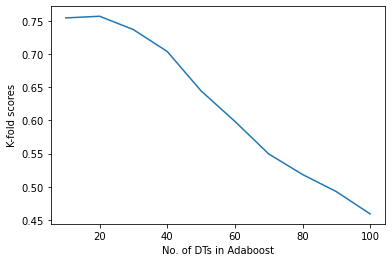

In [594]:
from sklearn.ensemble import AdaBoostRegressor

#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=0),
                                  X,y,cv=4).mean())
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

## CROSS - VALIDATION SCORE

In [596]:
adr = AdaBoostRegressor(n_estimators=25,random_state=0)
cross_val_score(AdaBoostRegressor(n_estimators=25,random_state=0),
                                  X,y,cv=4).mean()

0.7518710348317892

## GRID SEARCH SV TO GET BEST PARAMETERS

In [599]:
from sklearn.tree import DecisionTreeRegressor
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [20,30,70,80,90,100],
            'base_estimator': [DecisionTreeRegressor(max_depth=15,random_state=0),
                               DecisionTreeRegressor(max_depth=20,random_state=0),
                               DecisionTreeRegressor(max_depth=25,random_state=0),
                               DecisionTreeRegressor(max_depth=30,random_state=0)],
            'learning_rate': [0.1,0.001,0.5]
        }
model = GridSearchCV(AdaBoostRegressor(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=15,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=20,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=25,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=30,
                                                                  random_state=0)],
                         'learning_rate': [0.1, 0.001, 0.5],
                         'n_estimators': [20, 30, 70, 80, 90, 100]})

In [600]:
model.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=25, random_state=0),
 'learning_rate': 0.001,
 'n_estimators': 80}

In [601]:
model.best_score_

0.8700739889991762

In [602]:
best_model = model.best_estimator_

## TRAIN-TEST SPLIT

In [603]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

In [607]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.491614441416894
Mean Squared Error: 44.55320907697548
Root Mean Squared Error: 6.674819029529975


In [608]:
cv_ad_reg = cross_val_score(estimator = adr, X = X, y = y, cv = 4)
n,j
#y_pred_ad_reg_train = best_model.predict(X_train)
#r2_score_ad_reg_train = r2_score(y_train, y_pred_ad_reg_train)

y_pred_ad_reg_test = best_model.predict(X_test)
r2_score_ad_reg_test = r2_score(y_test, y_pred_ad_reg_test)

rmse_ad = (np.sqrt(mean_squared_error(y_test, y_pred_ad_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_ad_reg.mean()))
#print('R2_score (train) : {0:.3f}'.format(r2_score_ad_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_ad_reg_test))
print('RMSE : {0:.3f}'.format(rmse_ad))

CV Linear Regression : 0.752
R2_score (train) : 1.000
R2_score (test) : 0.838
RMSE : 4.834


## RESULLTS

## SVR

## CROSS-VALIDATION SCORE

In [45]:
svr = SVR(C=1.0, epsilon=0.2)

In [46]:
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(X,y,random_state=0)

In [47]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(svr,X_shuffled,y_shuffled,cv=4).mean()

-0.07628957861952235

## TRAIN-TEST SPLIT

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)

## SCALING

In [49]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

## GRID-SEARCH CV TO GET THE BEST PARAMETERS

In [1]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear'],
                        'degree': [2,3],
                        'gamma' : [0.1,1,10]
                    }

model = GridSearchCV(SVR(),param_grid=params_dictionary,cv=4)
model.fit(X_train_scaled,y)

NameError: name 'GridSearchCV' is not defined

In [ ]:
model.best_score_

In [ ]:
model.best_params_

In [ ]:
best_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = reg.predict(X_test_scaled)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
cv_svr_reg = cross_val_score(estimator = svr, X = X, y = y, cv = 4)

y_pred_svr_reg_train = best_model.predict(X_train_scaled)
r2_score_svr_reg_train = r2_score(y_train, y_pred_svr_reg_train)

y_pred_svr_reg_test = best_model.predict(X_test_scaled)
r2_score_svr_reg_test = r2_score(y_test, y_pred_svr_reg_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_svr_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_svr_reg_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

## RESULTS:

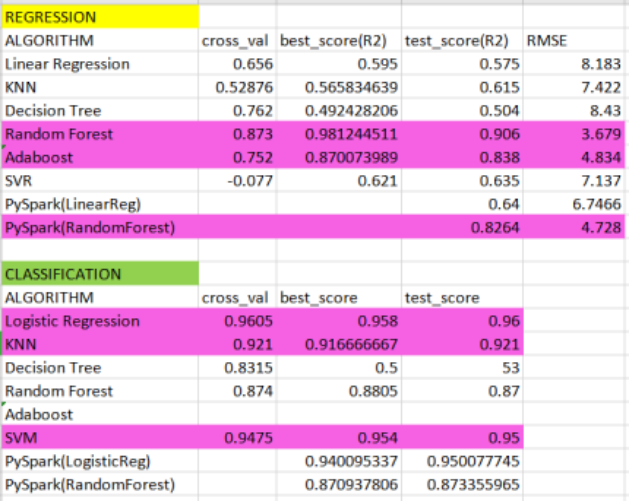

In [ ]:
CONCLUSION : For Regression on predicting price for used cars dataset ensemble techniques(RandomForest, Adaboost) gave a 
very good accuracy dor the data.
For Classification of mobile price range classification Logistic Regression,KNN,SVM gave a very good accuracy.